##Ensemble Technique

In [ ]:
from torchvision import transforms
from torchvision.datasets import ImageFolder, MNIST
from torchvision.models import resnet18
import torch
import torch.nn as nn
import torch.optim as optim
import zipfile
import os

# Define transformations
mnist_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize for ResNet
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

mnist_trainset = MNIST(root='./data', train=True, download=True, transform=mnist_transform)



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.9MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 491kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.47MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.31MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:


# Define paths for the uploaded zip files
uploaded_mri_path = '/content/MRI_dataset.zip'  # Adjust to your file name
uploaded_breast_cancer_path = '/content/breast_cancer.zip'
uploaded_imagenet_path = '/content/Tiny_ImageNet.zip'


# Function to extract zip files
def extract_zip(file_path, extract_to):
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f'Extracted {file_path} to {extract_to}')

# Extract the datasets
extract_zip(uploaded_mri_path, '/content/MRI_dataset')
extract_zip(uploaded_breast_cancer_path, '/content/breast_cancer')
extract_zip(uploaded_imagenet_path, '/content/Tiny_ImageNet')


Extracted /content/MRI_dataset.zip to /content/MRI_dataset
Extracted /content/breast_cancer.zip to /content/breast_cancer
Extracted /content/Tiny_ImageNet.zip to /content/Tiny_ImageNet


In [ ]:
# List extracted directories
print("MRI Dataset Contents:", os.listdir('/content/MRI_dataset/MRI_dataset'))
print("Breast Cancer Dataset Contents:", os.listdir('/content/breast_cancer/breast_cancer'))
print("ImageNet Dataset Contents:", os.listdir('/content/Tiny_ImageNet/tiny-imagenet-200/tiny-imagenet-200'))


MRI Dataset Contents: ['yes', 'no', '.DS_Store']
Breast Cancer Dataset Contents: ['normal', 'malignant', 'benign', '.DS_Store']
ImageNet Dataset Contents: ['words.txt', 'wnids.txt', 'val', 'train', 'test']


In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

mri_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Update normalization if required
])

mri_dataset = ImageFolder(root='/content/MRI_dataset/MRI_dataset', transform=mri_transform)
mri_loader = DataLoader(mri_dataset, batch_size=32, shuffle=True)


In [ ]:
breast_cancer_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Update normalization if required
])

breast_cancer_dataset = ImageFolder(root='/content/breast_cancer/breast_cancer', transform=breast_cancer_transform)
breast_cancer_loader = torch.utils.data.DataLoader(
    breast_cancer_dataset, batch_size=32, shuffle=True, num_workers=4
)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
import os
import shutil
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

# Paths
base_dir = "/content/Tiny_ImageNet/tiny-imagenet-200/tiny-imagenet-200"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

# Preprocess validation data
val_annotations_path = os.path.join(val_dir, "val_annotations.txt")
val_images_dir = os.path.join(val_dir, "images")

# Create class folders for validation set
with open(val_annotations_path, "r") as f:
    val_annotations = f.readlines()

for line in val_annotations:
    img_name, class_name, *_ = line.split("\t")
    class_dir = os.path.join(val_dir, class_name)
    if not os.path.exists(class_dir):
        os.makedirs(class_dir)
    # Move image to the corresponding class directory
    shutil.move(os.path.join(val_images_dir, img_name), os.path.join(class_dir, img_name))

# Remove the now-empty 'images' folder
shutil.rmtree(val_images_dir)

print("Validation set reorganized successfully!")


Validation set reorganized successfully!


In [ ]:
# Define transformations
imagenet_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Standard ImageNet normalization
])

# Load datasets
imagenet_train_dataset = ImageFolder(root=train_dir, transform=imagenet_transform)
imagenet_val_dataset = ImageFolder(root=val_dir, transform=imagenet_transform)

# Create data loaders
imagenet_train_loader = DataLoader(imagenet_train_dataset, batch_size=64, shuffle=True, num_workers=2)
imagenet_val_loader = DataLoader(imagenet_val_dataset, batch_size=64, shuffle=False, num_workers=2)

print(f"Train set size: {len(imagenet_train_dataset)}")
print(f"Validation set size: {len(imagenet_val_dataset)}")


Train set size: 100000
Validation set size: 10000


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations
mnist_transforms = transforms.Compose([
    transforms.Resize((224, 224)),           # Resize to 224x224
    transforms.Grayscale(num_output_channels=3),  # Convert to 3 channels
    transforms.ToTensor(),                  # Convert to tensor
    transforms.Normalize((0.5,), (0.5,))    # Normalize to [-1, 1]
])

# Load MNIST dataset
mnist_train = datasets.MNIST(root='./data', train=True, transform=mnist_transforms, download=True)
mnist_test = datasets.MNIST(root='./data', train=False, transform=mnist_transforms, download=True)

mnist_train_loader = DataLoader(mnist_train, batch_size=64, shuffle=True)
mnist_test_loader = DataLoader(mnist_test, batch_size=64, shuffle=False)


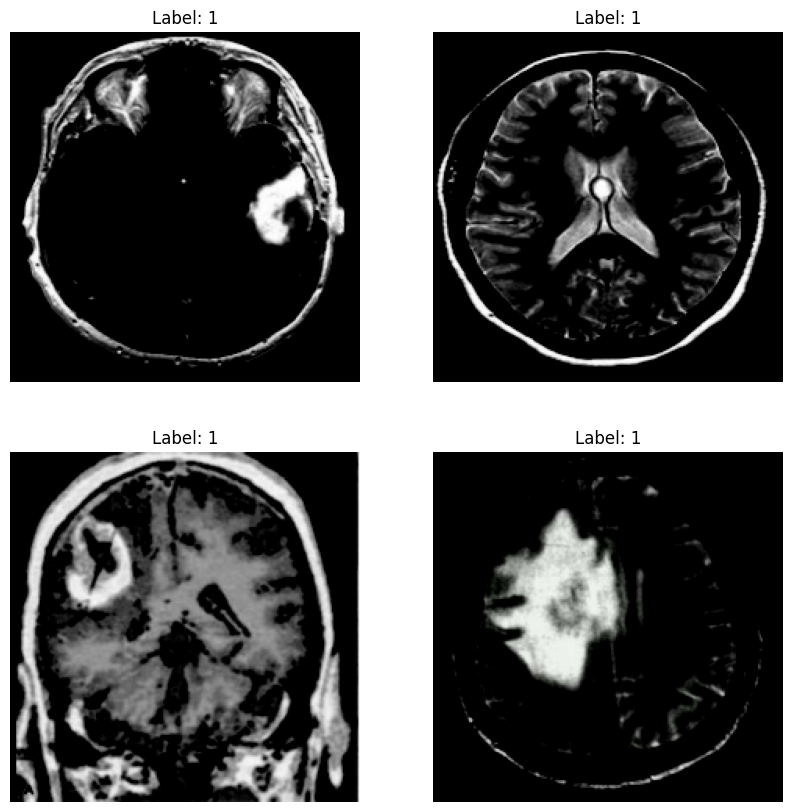

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img, title=None):
    img = img.numpy().transpose((1, 2, 0))
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    if title:
        plt.title(title)
    plt.axis('off')

# Example: Show MRI images
data_iter = iter(mri_loader)
images, labels = next(data_iter)

plt.figure(figsize=(10, 10))
for i in range(4):  # Show 4 images
    plt.subplot(2, 2, i + 1)
    imshow(images[i], title=f'Label: {labels[i]}')
plt.show()


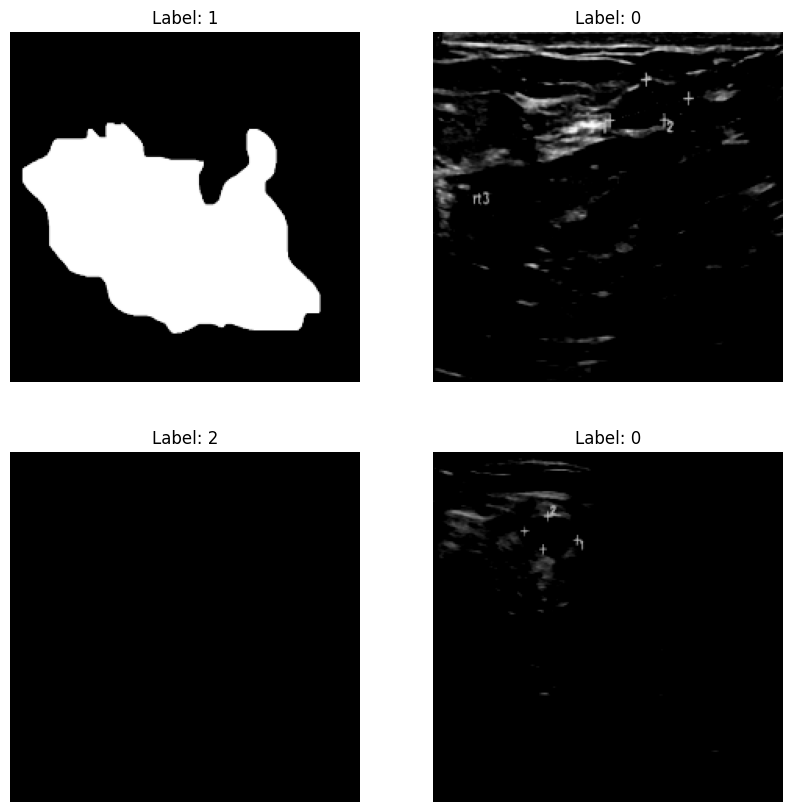

In [ ]:


def imshow(img, title=None):
    img = img.numpy().transpose((1, 2, 0))
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    if title:
        plt.title(title)
    plt.axis('off')

# Example: Show breast cancer images
data_iter = iter(breast_cancer_loader)
images, labels = next(data_iter)

plt.figure(figsize=(10, 10))
for i in range(4):  # Show 4 images
    plt.subplot(2, 2, i + 1)
    imshow(images[i], title=f'Label: {labels[i]}')
plt.show()


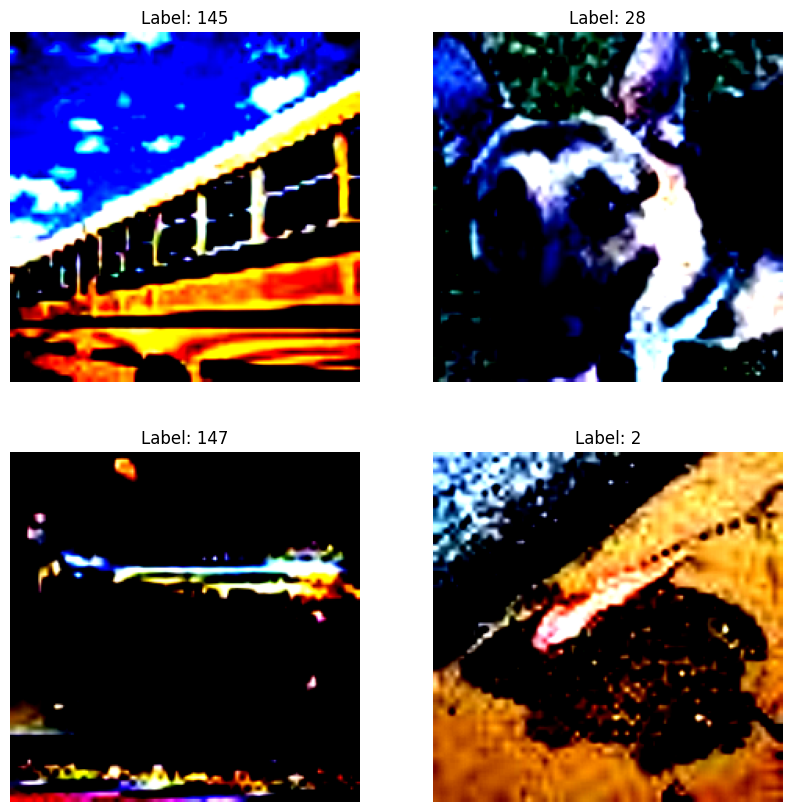

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img, title=None):
    img = img.numpy().transpose((1, 2, 0))
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    if title:
        plt.title(title)
    plt.axis('off')

# Example: Show imagenet images
data_iter = iter(imagenet_train_loader)
images, labels = next(data_iter)

plt.figure(figsize=(10, 10))
for i in range(4):  # Show 4 images
    plt.subplot(2, 2, i + 1)
    imshow(images[i], title=f'Label: {labels[i]}')
plt.show()


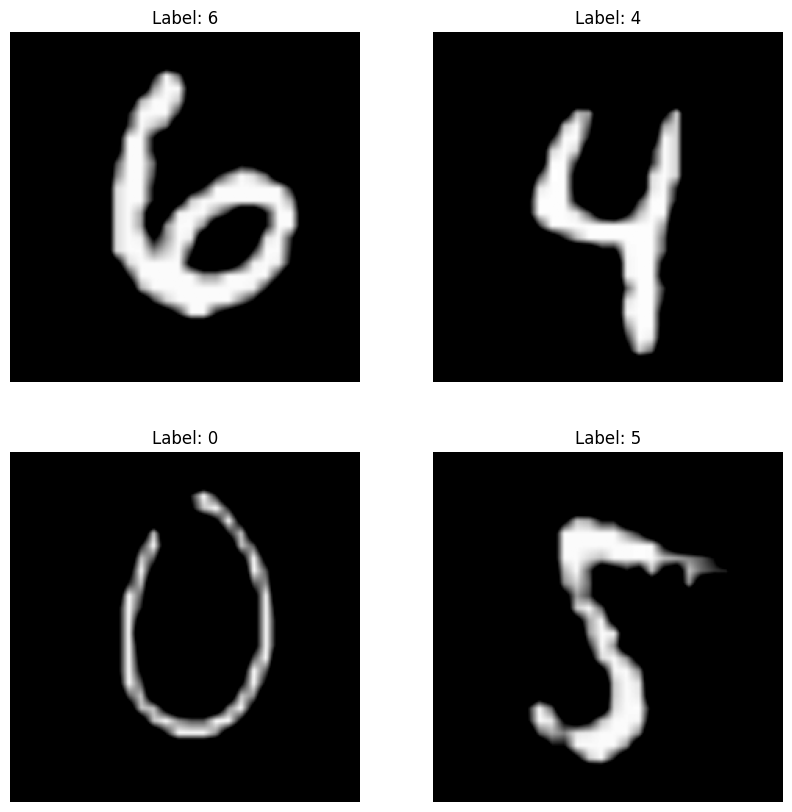

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img, title=None):
    img = img.numpy().transpose((1, 2, 0))
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    if title:
        plt.title(title)
    plt.axis('off')

# Example: Show MNIST images
data_iter = iter(mnist_train_loader)
images, labels = next(data_iter)

plt.figure(figsize=(10, 10))
for i in range(4):  # Show 4 images
    plt.subplot(2, 2, i + 1)
    imshow(images[i], title=f'Label: {labels[i]}')
plt.show()


In [ ]:
# # Define ResNet-18
# def train_resnet(dataset, epochs=10, save_path='model.pth'):
#     trainloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2)
#     device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#     model = resnet18(pretrained=False)
#     model.fc = nn.Linear(model.fc.in_features, num_classes)  # Modify for dataset classes
#     model = model.to(device)

#     criterion = nn.CrossEntropyLoss()
#     optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

#     for epoch in range(epochs):
#         model.train()
#         running_loss = 0.0
#         for i, data in enumerate(trainloader, 0):
#             inputs, labels = data[0].to(device), data[1].to(device)
#             optimizer.zero_grad()
#             outputs = model(inputs)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()
#             running_loss += loss.item()
#         print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(trainloader)}')

#     torch.save(model.state_dict(), save_path)
#     print(f'Model saved to {save_path}')


In [ ]:
from torchvision.models import resnet18
import torch.nn as nn
import torch.optim as optim
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def train_model(model, loader, criterion, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(loader):.4f}")
    return model


In [ ]:
# Define ResNet-18 for MRI dataset
mri_model = resnet18(pretrained=True)
mri_model.fc = nn.Linear(mri_model.fc.in_features, len(mri_dataset.classes))  # Adjust classes
mri_model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mri_model.parameters(), lr=0.01, momentum=0.9)

# Train MRI model
trained_mri_model = train_model(mri_model, mri_loader, criterion, optimizer, epochs=10)

# Save the weights
torch.save(trained_mri_model.state_dict(), '/content/mri_weights.pth')
print("MRI model weights saved as mri_weights.pth")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 79.4MB/s]


Epoch [1/10], Loss: 0.6849
Epoch [2/10], Loss: 0.2988
Epoch [3/10], Loss: 0.1651
Epoch [4/10], Loss: 0.1269
Epoch [5/10], Loss: 0.0957
Epoch [6/10], Loss: 0.2101
Epoch [7/10], Loss: 0.0469
Epoch [8/10], Loss: 0.0496
Epoch [9/10], Loss: 0.0077
Epoch [10/10], Loss: 0.0090
MRI model weights saved as mri_weights.pth


In [ ]:
# Check number of classes in the dataset
print("Classes:", breast_cancer_dataset.classes)
print("Number of classes:", len(breast_cancer_dataset.classes))


Classes: ['benign', 'malignant', 'normal']
Number of classes: 3


In [ ]:
# Define ResNet-18 for Breast Cancer dataset
breast_cancer_model = resnet18(pretrained=True)
breast_cancer_model.fc = nn.Linear(breast_cancer_model.fc.in_features, len(breast_cancer_dataset.classes))
breast_cancer_model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(breast_cancer_model.parameters(), lr=0.001, momentum=0.9)

# Train Breast Cancer model
trained_breast_cancer_model = train_model(breast_cancer_model, breast_cancer_loader, criterion, optimizer, epochs=10)
#validation
# def evaluate_model(model, loader, criterion):
#     model.eval()
#     total_loss = 0.0
#     correct = 0
#     total = 0
#     with torch.no_grad():
#         for images, labels in loader:
#             outputs = model(images)
#             loss = criterion(outputs, labels)
#             total_loss += loss.item()
#             _, preds = torch.max(outputs, 1)
#             correct += (preds == labels).sum().item()
#             total += labels.size(0)
#     accuracy = 100 * correct / total
#     print(f"Validation Loss: {total_loss:.4f}, Accuracy: {accuracy:.2f}%")


# Save the weights
torch.save(trained_breast_cancer_model.state_dict(), '/content/breast_cancer_weights.pth')
print("Breast Cancer model weights saved as breast_cancer_weights.pth")


Epoch [1/10], Loss: 0.6585
Epoch [2/10], Loss: 0.3018
Epoch [3/10], Loss: 0.2004
Epoch [4/10], Loss: 0.1244
Epoch [5/10], Loss: 0.0728
Epoch [6/10], Loss: 0.0541
Epoch [7/10], Loss: 0.0377
Epoch [8/10], Loss: 0.0250
Epoch [9/10], Loss: 0.0230
Epoch [10/10], Loss: 0.0190
Breast Cancer model weights saved as breast_cancer_weights.pth


In [ ]:
from torchvision.models import resnet18, ResNet18_Weights
import torch.nn as nn
import torch.optim as optim
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define transformations for the MNIST dataset
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to 1 channel
    transforms.Resize((64, 64)),  # Resize to 64x64
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize for MNIST
])

# Load MNIST dataset
mnist_train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
mnist_train_loader = DataLoader(mnist_train_dataset, batch_size=128, shuffle=True)

# Load pretrained ResNet-18 model with ImageNet weights
weights = ResNet18_Weights.IMAGENET1K_V1
mnist_model = resnet18(weights=weights)

# Modify the first convolutional layer for single-channel input
# Since MNIST is grayscale, change the input channels from 3 to 1
mnist_model.conv1 = nn.Conv2d(
    in_channels=1,  # For grayscale images
    out_channels=64,  # Keep the original output channels (64)
    kernel_size=7,
    stride=2,
    padding=3,
    bias=False
)

# Modify the final fully connected layer for 10 classes (MNIST)
mnist_model.fc = nn.Linear(mnist_model.fc.in_features, 10)

# Move the model to the appropriate device
mnist_model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mnist_model.parameters(), lr=0.001)  # Use Adam for faster convergence

# Train the model
trained_mnist_model = train_model(mnist_model, mnist_train_loader, criterion, optimizer, epochs=10)

# Save the weights
torch.save(trained_mnist_model.state_dict(), '/content/mnist_weights_64x64.pth')
print("MNIST model pretrained weights fine-tuned and saved as mnist_weights_64x64.pth")


Epoch [1/10], Loss: 0.0938
Epoch [2/10], Loss: 0.0411
Epoch [3/10], Loss: 0.0312
Epoch [4/10], Loss: 0.0259
Epoch [5/10], Loss: 0.0244
Epoch [6/10], Loss: 0.0215
Epoch [7/10], Loss: 0.0176
Epoch [8/10], Loss: 0.0155
Epoch [9/10], Loss: 0.0161
Epoch [10/10], Loss: 0.0144
MNIST model pretrained weights fine-tuned and saved as mnist_weights_64x64.pth


In [ ]:
import torch
import torch.nn as nn
from torchvision import models

# Load ResNet-18 with pretrained weights from ImageNet
imagenet_model = models.resnet18(pretrained=True)

# The model is now ready to use with the pretrained ImageNet weights
imagenet_model.eval()  # Set the model to evaluation mode

# If you want to modify the final layer for CIFAR-10 or any other task, you can do it like this:
imagenet_model.fc = nn.Linear(imagenet_model.fc.in_features, 10)  # Adjusting for 10 classes (e.g., CIFAR-10)

# Now, the model is ready for inference or fine-tuning on a new dataset
# Save the pretrained model weights (optional)
torch.save(imagenet_model.state_dict(), '/content/imagenet_weights.pth')
print("ImageNet model weights saved as imagenet_weights.pth")


ImageNet model weights saved as imagenet_weights.pth


##Load pretrained weights

In [ ]:
# Load MRI weights into a new ResNet-18 model
mri_model = resnet18(pretrained=False)
mri_model.fc = nn.Linear(mri_model.fc.in_features, len(mri_dataset.classes))
mri_model.load_state_dict(torch.load('/content/mri_weights.pth'))
mri_model.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-20-98eb71436dea>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommen

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# Load breast cancer weights into a new ResNet-18 model
breast_cancer_model = resnet18(pretrained=False)
breast_cancer_model.fc = nn.Linear(mri_model.fc.in_features, len(breast_cancer_dataset.classes))
breast_cancer_model.load_state_dict(torch.load('/content/breast_cancer_weights.pth'))
breast_cancer_model.to(device)


<ipython-input-21-cafb139f30ca>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  breast_cancer_model.load_state_dict(torch.load('/content/breast_cancer_weights.pth'))


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# Load imagenet weights with a compatible fc layer
imagenet_model = resnet18(pretrained=False)
imagenet_model.fc = nn.Linear(imagenet_model.fc.in_features, 10)  # Match the saved weights
imagenet_model.load_state_dict(torch.load('/content/imagenet_weights.pth'))

# Reinitialize the fc layer for the new task (200 classes)
imagenet_model.fc = nn.Linear(imagenet_model.fc.in_features, len(imagenet_train_dataset.classes))
imagenet_model.to(device)

# At this point, you need to train the new fc layer (fine-tuning) on your specific dataset

<ipython-input-22-417477070683>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  imagenet_model.load_state_dict(torch.load('/content/imagenet_weights.pth'))


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# Load the ResNet-18 model (without the pretrained weights for now)
mnist_model = resnet18(pretrained=False)

# Modify the first convolutional layer to accept 1-channel input (grayscale)
mnist_model.conv1 = nn.Conv2d(
    in_channels=1,  # For grayscale images
    out_channels=64,  # Keep the original number of output channels (64)
    kernel_size=7,
    stride=2,
    padding=3,
    bias=False
)

# Load the pretrained weights (excluding the modified layers)
# This will load weights for the layers that match (except `conv1` and `fc`)
pretrained_dict = torch.load('/content/mnist_weights_64x64.pth')
model_dict = mnist_model.state_dict()

# Remove keys related to conv1 and fc layers
pretrained_dict = {k: v for k, v in pretrained_dict.items() if 'conv1' not in k and 'fc' not in k}

# Update the model's state dict with the pretrained weights
model_dict.update(pretrained_dict)

# Load the updated state dict into the model
mnist_model.load_state_dict(model_dict)

# Modify the final fully connected layer to match the MNIST dataset (10 classes)
mnist_model.fc = nn.Linear(mnist_model.fc.in_features, 10)  # 10 classes for MNIST

# Move the model to the device (GPU or CPU)
mnist_model.to(device)

<ipython-input-23-720efc7f8b12>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pretrained_dict = torch.load('/content/mnist_weights_64x64.pth')


ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:


ensemble_models = [imagenet_model, mnist_model, mri_model, breast_cancer_model]
# ensemble_models = [ mri_model]



In [ ]:
!pip install torch --upgrade


In [ ]:
torch.backends.cudnn.benchmark = True


In [ ]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Modify the first convolution layer for CIFAR-10 (3-channel input)
for model in ensemble_models:
    model.conv1 = nn.Conv2d(
        in_channels=3,  # CIFAR-10 has 3 channels (RGB)
        out_channels=64,  # Keep the original output channels (64)
        kernel_size=7,
        stride=2,
        padding=3,
        bias=False
    )

    num_features = model.fc.in_features  # Get the number of input features to the final layer
    model.fc = nn.Linear(num_features, 10)
    model = model.to(device)


# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Clear cache
torch.cuda.empty_cache()


In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [ ]:
import os
import torch
import torchvision
import torch.optim as optim
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Set CUDA_LAUNCH_BLOCKING for synchronous error reporting
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

# CIFAR-10 dataset with resizing for compatibility with ResNet models
cifar_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.Resize((224, 224)),  # Resize to 224x224 for ResNet models
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

cifar_trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=cifar_transform)
cifar_trainloader = DataLoader(cifar_trainset, batch_size=128, shuffle=True)

# Ensure labels are in the correct range
for inputs, labels in cifar_trainloader:
    print(torch.unique(labels))
    if (labels >= 10).any():  # Check if any label is out of range
        print("Error: Labels out of range.")
    break

# Model, criterion, optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mri_model = mri_model.to(device)  # Ensure the model is on the correct device
criterion = nn.CrossEntropyLoss()
optimizer_func = lambda params: optim.SGD(params, lr=0.01, momentum=0.9, weight_decay=5e-4)

# Fine-tuning function
def fine_tune_model(model, trainloader, criterion, optimizer_func, epochs=10):
    model.to(device)  # Make sure the model is on the right device
    optimizer = optimizer_func(model.parameters())
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)  # Ensure data is on the right device
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(trainloader):.4f}")

# Fine-tune the model
fine_tune_model(mri_model, cifar_trainloader, criterion, optimizer_func, epochs=10)

# Clear cache
torch.cuda.empty_cache()


100%|██████████| 170M/170M [00:03<00:00, 48.2MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Epoch [1/10], Loss: 0.6958
Epoch [2/10], Loss: 0.2906
Epoch [3/10], Loss: 0.2015
Epoch [4/10], Loss: 0.1572
Epoch [5/10], Loss: 0.1331
Epoch [6/10], Loss: 0.1053
Epoch [7/10], Loss: 0.0902
Epoch [8/10], Loss: 0.0797
Epoch [9/10], Loss: 0.0713
Epoch [10/10], Loss: 0.0660


In [ ]:
fine_tune_model(mnist_model, cifar_trainloader, criterion, optimizer_func, epochs=10)

Epoch [1/10], Loss: 1.5930
Epoch [2/10], Loss: 1.0462
Epoch [3/10], Loss: 0.7867
Epoch [4/10], Loss: 0.6465
Epoch [5/10], Loss: 0.5504
Epoch [6/10], Loss: 0.4844
Epoch [7/10], Loss: 0.4396
Epoch [8/10], Loss: 0.3955
Epoch [9/10], Loss: 0.3653
Epoch [10/10], Loss: 0.3334


In [ ]:
fine_tune_model(breast_cancer_model, cifar_trainloader, criterion, optimizer_func, epochs=10)

Epoch [1/10], Loss: 0.6046
Epoch [2/10], Loss: 0.2344
Epoch [3/10], Loss: 0.1636
Epoch [4/10], Loss: 0.1252
Epoch [5/10], Loss: 0.1035
Epoch [6/10], Loss: 0.0833
Epoch [7/10], Loss: 0.0745
Epoch [8/10], Loss: 0.0606
Epoch [9/10], Loss: 0.0527
Epoch [10/10], Loss: 0.0515


In [ ]:
fine_tune_model(imagenet_model, cifar_trainloader, criterion, optimizer_func, epochs=10)

Epoch [1/10], Loss: 0.5990
Epoch [2/10], Loss: 0.2425
Epoch [3/10], Loss: 0.1717
Epoch [4/10], Loss: 0.1324
Epoch [5/10], Loss: 0.1084


##Making Predictions with the Ensemble

In [ ]:
# CIFAR-10 Test Dataset
cifar_testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=cifar_transform)
cifar_testloader = DataLoader(cifar_testset, batch_size=64, shuffle=False)

# Ensemble prediction
def ensemble_predict(models, dataloader):
    models = [model.eval() for model in models]  # Set all models to eval mode
    all_outputs = []

    with torch.no_grad():
        for inputs, _ in dataloader:
            inputs = inputs.to(device)
            outputs = torch.zeros((inputs.size(0), 10), device=device)  # Aggregate predictions

            for model in models:
                model=model.to(device)
                outputs += nn.Softmax(dim=1)(model(inputs))  # Softmax probabilities

            outputs /= len(models)  # Average predictions
            all_outputs.append(outputs)

    return torch.cat(all_outputs, dim=0)  # Combine outputs

ensemble_predictions = ensemble_predict(ensemble_models, cifar_testloader)


In [ ]:
# Accuracy and Uncertainty
def evaluate_ensemble(predictions, dataloader):
    correct = 0
    total = 0
    uncertainties = []

    for i, (_, labels) in enumerate(dataloader):
        labels = labels.to(device)
        probs = predictions[i * 64: (i + 1) * 64]  # Batch predictions
        _, predicted = torch.max(probs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

        # Compute entropy-based uncertainty
        entropy = -torch.sum(probs * torch.log(probs + 1e-6), dim=1)
        uncertainties.extend(entropy.cpu().numpy())

    accuracy = 100 * correct / total
    avg_uncertainty = np.mean(uncertainties)
    return accuracy, avg_uncertainty

accuracy, avg_uncertainty = evaluate_ensemble(ensemble_predictions, cifar_testloader)
print(f"Ensemble Accuracy: {accuracy:.2f}%, Average Uncertainty: {avg_uncertainty:.4f}")


In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Check for device (GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 1. Load CIFAR-10 dataset with transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

# Load ensemble models
ensemble_models = []
num_models = 4  # Assuming 4 ensemble members

for i in range(num_models):
    model = torchvision.models.resnet18()
    model.fc = nn.Linear(model.fc.in_features, 10)  # CIFAR-10 has 10 classes
    model.load_state_dict(torch.load(f'./model_{i+1}_cifar10_weights.pth'))  # Load pretrained weights
    model.to(device)
    model.eval()
    ensemble_models.append(model)

# Function to calculate entropy
def calculate_entropy(probabilities):
    probabilities = np.clip(probabilities, 1e-10, 1.0)  # Avoid log(0)
    return -np.sum(probabilities * np.log(probabilities), axis=1)

# Function to compute uncertainty and entropy using ensemble
def calculate_uncertainty_and_entropy_ensemble(models, testloader):
    correct_entropy = []
    incorrect_entropy = []

    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            ensemble_outputs = []

            # Collect predictions from all ensemble members
            for model in models:
                outputs = model(inputs)
                ensemble_outputs.append(outputs)

            ensemble_outputs = torch.stack(ensemble_outputs)  # Shape: [num_models, batch_size, num_classes]
            mean_outputs = torch.mean(ensemble_outputs, dim=0)  # Mean prediction across ensemble

            # Convert to probabilities (softmax)
            probabilities = torch.softmax(mean_outputs, dim=1).cpu().numpy()

            # Calculate entropy for each prediction
            entropy_values = calculate_entropy(probabilities)

            # Get the predicted class
            predicted = torch.argmax(mean_outputs, dim=1)

            # Classify predictions as correct or incorrect
            for i in range(len(labels)):
                if predicted[i] == labels[i]:
                    correct_entropy.append(entropy_values[i])
                else:
                    incorrect_entropy.append(entropy_values[i])

    return correct_entropy, incorrect_entropy

# Function to plot both histogram and KDE for correct and incorrect predictions
def plot_entropy_with_histogram(correct_entropy, incorrect_entropy):
    plt.figure(figsize=(12, 6))

    # KDE and Histogram for correct predictions
    sns.histplot(correct_entropy, color='green', label='Correct Predictions', bins=50, kde=True, stat="density", alpha=0.3)

    # KDE and Histogram for incorrect predictions
    sns.histplot(incorrect_entropy, color='red', label='Incorrect Predictions', bins=50, kde=True, stat="density", alpha=0.3)

    # Customize the plot
    plt.title('Entropy Distribution for Correct vs Incorrect Predictions (Ensemble)')
    plt.xlabel('Entropy')
    plt.ylabel('Density')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage
correct_entropy, incorrect_entropy = calculate_uncertainty_and_entropy_ensemble(ensemble_models, testloader)
plot_entropy_with_histogram(correct_entropy, incorrect_entropy)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from torchvision.models import resnet18

# Check for device (GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# CIFAR-10 dataset and DataLoader
cifar_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])
cifar_testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=cifar_transform)
cifar_testloader = DataLoader(cifar_testset, batch_size=64, shuffle=False)

# Function for ensemble predictions and entropy calculation
def ensemble_predict_and_entropy(models, dataloader):
    models = [model.eval().to(device) for model in models]  # Set models to eval mode
    all_entropies = []
    all_correct = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = torch.zeros((inputs.size(0), 10), device=device)  # Aggregate predictions

            # Aggregate predictions from all models
            for model in models:
                outputs += nn.Softmax(dim=1)(model(inputs))
            outputs /= len(models)  # Average predictions

            # Calculate entropy for each image
            entropy = -torch.sum(outputs * torch.log(outputs + 1e-6), dim=1)  # Shape: [batch_size]
            all_entropies.extend(entropy.cpu().numpy())

            # Determine if predictions are correct
            _, predicted = torch.max(outputs, 1)
            correct = (predicted == labels).cpu().numpy()
            all_correct.extend(correct)

    return np.array(all_entropies), np.array(all_correct)

# Visualization: KDE plot for correct and incorrect predictions
def plot_entropy_kde(entropies, correct_flags):
    correct_entropies = entropies[correct_flags]
    incorrect_entropies = entropies[~correct_flags]

    plt.figure(figsize=(12, 6))
    sns.kdeplot(correct_entropies, color='green', label='Correct Predictions', fill=True, alpha=0.5)
    sns.kdeplot(incorrect_entropies, color='red', label='Incorrect Predictions', fill=True, alpha=0.5)

    plt.title('Entropy Distribution for Correct vs Incorrect Predictions (KDE)')
    plt.xlabel('Entropy')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Example Usage
# Assuming `ensemble_models` is a list of pretrained ensemble models
# Replace with your actual ensemble
ensemble_models = [
    resnet18(pretrained=True).to(device) for _ in range(4)  # Example with 4 ResNet-18 models
]

# Calculate entropy and correctness
entropies, correct_flags = ensemble_predict_and_entropy(ensemble_models, cifar_testloader)

# Plot KDE for entropy
plot_entropy_kde(entropies, correct_flags)


## Droprate vs Accuracy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Function to get predictions and uncertainties (entropy) on the entire test dataset using an ensemble
def get_ensemble_predictions_and_uncertainty(ensemble_models, testset):
    testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)
    all_probs = []
    all_uncertainties = []
    all_labels = []

    # Ensure all models are in evaluation mode
    ensemble_models = [model.eval().to(device) for model in ensemble_models]

    with torch.no_grad():
        for inputs, labels in testloader:
            inputs = inputs.to(device)
            batch_probs = torch.zeros((inputs.size(0), 10), device=device)  # Aggregate probabilities

            # Aggregate predictions from all models
            for model in ensemble_models:
                outputs = model(inputs)
                batch_probs += F.softmax(outputs, dim=1)  # Convert logits to probabilities

            batch_probs /= len(ensemble_models)  # Average probabilities across ensemble

            # Compute entropy for each image
            entropy = -batch_probs * torch.log(batch_probs + 1e-6)  # Entropy for uncertainty
            uncertainty_entropy = torch.sum(entropy, dim=1)  # Total uncertainty per image

            # Append to lists
            all_probs.extend(batch_probs.cpu().numpy())
            all_uncertainties.extend(uncertainty_entropy.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return np.array(all_probs), np.array(all_uncertainties), np.array(all_labels)


# Function to compute accuracy after dropping a percentage of the most uncertain images
def compute_accuracy_after_drop(all_probs, all_uncertainties, all_labels, drop_percentage):
    num_images = len(all_uncertainties)
    drop_count = int(num_images * drop_percentage)

    # Get indices of images to drop based on uncertainty
    sorted_indices = np.argsort(all_uncertainties)  # Sort by increasing uncertainty
    remaining_indices = sorted_indices[:-drop_count]  # Drop most uncertain images

    # Compute accuracy on the remaining images
    remaining_probs = all_probs[remaining_indices]
    remaining_labels = all_labels[remaining_indices]
    predicted_classes = np.argmax(remaining_probs, axis=1)

    accuracy = np.mean(predicted_classes == remaining_labels) * 100
    return accuracy


# Function to plot Drop Rate vs Accuracy for an ensemble
def plot_drop_rate_vs_accuracy_ensemble(ensemble_models, testset, drop_steps=None):
    if drop_steps is None:
        drop_steps = [i / 10 for i in range(1, 10)]  # Drop rates from 10% to 90%

    # Step 1: Get predictions and uncertainties for the entire test set
    all_probs, all_uncertainties, all_labels = get_ensemble_predictions_and_uncertainty(ensemble_models, testset)

    drop_rates = []
    accuracies = []

    # Step 2: Iterate over different drop rates and calculate accuracy
    for drop_rate in drop_steps:
        accuracy = compute_accuracy_after_drop(all_probs, all_uncertainties, all_labels, drop_rate)
        drop_rates.append(drop_rate * 100)  # Convert to percentage
        accuracies.append(accuracy)
        print(f'Drop Rate: {drop_rate*100:.1f}%, Accuracy: {accuracy:.2f}%')

    # Step 3: Plot the drop rate vs accuracy graph
    plt.figure(figsize=(8, 6))
    plt.plot(drop_rates, accuracies, marker='o', linestyle='-', color='b')
    plt.title('Drop Rate vs Average Accuracy (Ensemble)')
    plt.xlabel('Drop Rate (%)')
    plt.ylabel('Accuracy (%)')
    plt.grid(True)
    plt.show()


# Example Usage
# Assuming `ensemble_models` is a list of pretrained ensemble models
# Replace with your actual ensemble models
ensemble_models = [
    resnet18(pretrained=True).to(device) for _ in range(4)  # Example with 4 ResNet-18 models
]

# CIFAR-10 Test Dataset
cifar_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])
cifar_testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=cifar_transform)

# Plot Drop Rate vs Accuracy
plot_drop_rate_vs_accuracy_ensemble(ensemble_models, cifar_testset, drop_steps=[i / 10 for i in range(1, 10)])


##OOD vs ID

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn.functional as F

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load MNIST dataset (OOD)
mnist_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert 1 channel to 3 channels
    transforms.Resize((32, 32)),                 # Resize to CIFAR-10 dimensions
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))  # CIFAR-10 normalization
])

ood_mnist = datasets.MNIST(root='./data', train=False, download=True, transform=mnist_transform)

# Define ID (CIFAR-10 test set) and OOD dataset (MNIST)
id_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)
ood_loader = torch.utils.data.DataLoader(ood_mnist, batch_size=64, shuffle=False)

# Function to compute uncertainty using ensemble technique
def compute_ensemble_uncertainty(models, dataloader):
    """
    Compute uncertainties using ensemble models.
    """
    models = [model.eval().to(device) for model in models]
    uncertainties = []

    with torch.no_grad():
        for inputs, _ in dataloader:
            inputs = inputs.to(device)
            batch_probs = torch.zeros((inputs.size(0), 10), device=device)

            # Aggregate predictions from ensemble models
            for model in models:
                outputs = model(inputs)
                batch_probs += F.softmax(outputs, dim=1)  # Convert logits to probabilities

            batch_probs /= len(models)  # Average probabilities across ensemble

            # Compute entropy per sample
            entropy = -batch_probs * torch.log(batch_probs + 1e-6)
            uncertainty_entropy = torch.sum(entropy, dim=1)  # Total uncertainty per image
            uncertainties.extend(uncertainty_entropy.cpu().numpy())

    return np.array(uncertainties)

# Compute uncertainties for ID and OOD using Ensemble
ensemble_id_uncertainties = compute_ensemble_uncertainty(ensemble_models, id_loader)
ensemble_ood_uncertainties = compute_ensemble_uncertainty(ensemble_models, ood_loader)

# Plot comparison: Histogram for Ensemble
plt.figure(figsize=(12, 6))

# Ensemble Histogram
plt.hist(ensemble_id_uncertainties, bins=50, alpha=0.7, label="ID (CIFAR-10)", color='blue')
plt.hist(ensemble_ood_uncertainties, bins=50, alpha=0.7, label="OOD (MNIST)", color='red')
plt.axvline(x=np.mean(ensemble_id_uncertainties), color='blue', linestyle='--', label=f'ID Mean: {np.mean(ensemble_id_uncertainties):.4f}')
plt.axvline(x=np.mean(ensemble_ood_uncertainties), color='red', linestyle='--', label=f'OOD Mean: {np.mean(ensemble_ood_uncertainties):.4f}')
plt.title("Histogram: Ensemble Uncertainty", fontsize=14)
plt.xlabel("Uncertainty (Entropy)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()

plt.show()

# Plot comparison: KDE for Ensemble
plt.figure(figsize=(12, 6))

# Ensemble KDE
sns.kdeplot(ensemble_id_uncertainties, color='blue', label="ID (CIFAR-10)", fill=True, alpha=0.6)
sns.kdeplot(ensemble_ood_uncertainties, color='red', label="OOD (MNIST)", fill=True, alpha=0.6)
plt.axvline(x=np.mean(ensemble_id_uncertainties), color='blue', linestyle='--', label=f'ID Mean: {np.mean(ensemble_id_uncertainties):.4f}')
plt.axvline(x=np.mean(ensemble_ood_uncertainties), color='red', linestyle='--', label=f'OOD Mean: {np.mean(ensemble_ood_uncertainties):.4f}')
plt.title("KDE: Ensemble Uncertainty", fontsize=14)
plt.xlabel("Uncertainty (Entropy)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()

plt.show()


ROC AUC

In [ ]:
import torch
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Function to calculate uncertainties and AUROC for OOD detection using ensemble technique
def ood_uncertainty_auroc_ensemble(models, id_dataset, ood_dataset, passes=20):
    # Create dataloaders for both ID and OOD datasets
    id_loader = torch.utils.data.DataLoader(id_dataset, batch_size=100, shuffle=False)
    ood_loader = torch.utils.data.DataLoader(ood_dataset, batch_size=100, shuffle=False)

    id_uncertainties = []
    ood_uncertainties = []

    # Collect uncertainty values for ID samples using ensemble technique
    for batch in id_loader:
        inputs, _ = batch[0].to(device), batch[1].to(device)
        batch_uncertainties = []

        with torch.no_grad():
            for _ in range(passes):
                # Aggregate predictions from all models in the ensemble
                ensemble_outputs = torch.zeros((inputs.size(0), 10), device=device)
                for model in models:
                    model.eval().to(device)
                    outputs = model(inputs)
                    ensemble_outputs += F.softmax(outputs, dim=1)  # Convert logits to probabilities
                ensemble_outputs /= len(models)  # Average the outputs from ensemble

                # Calculate entropy for uncertainty
                entropy = -ensemble_outputs * torch.log(ensemble_outputs + 1e-6)
                uncertainty_entropy = torch.sum(entropy, dim=1)  # Total uncertainty per image
                batch_uncertainties.append(uncertainty_entropy.cpu().numpy())

        id_uncertainties.extend(np.mean(batch_uncertainties, axis=0))  # Average over passes for ID samples

    # Collect uncertainty values for OOD samples using ensemble technique
    for batch in ood_loader:
        inputs, _ = batch[0].to(device), batch[1].to(device)
        batch_uncertainties = []

        with torch.no_grad():
            for _ in range(passes):
                # Aggregate predictions from all models in the ensemble
                ensemble_outputs = torch.zeros((inputs.size(0), 10), device=device)
                for model in models:
                    model.eval().to(device)
                    outputs = model(inputs)
                    ensemble_outputs += F.softmax(outputs, dim=1)  # Convert logits to probabilities
                ensemble_outputs /= len(models)  # Average the outputs from ensemble

                # Calculate entropy for uncertainty
                entropy = -ensemble_outputs * torch.log(ensemble_outputs + 1e-6)
                uncertainty_entropy = torch.sum(entropy, dim=1)  # Total uncertainty per image
                batch_uncertainties.append(uncertainty_entropy.cpu().numpy())

        ood_uncertainties.extend(np.mean(batch_uncertainties, axis=0))  # Average over passes for OOD samples

    # Concatenate uncertainties and create labels
    all_uncertainties = np.array(id_uncertainties + ood_uncertainties)
    all_labels = np.array([0] * len(id_uncertainties) + [1] * len(ood_uncertainties))  # ID=0, OOD=1

    # Compute AUROC
    auroc = roc_auc_score(all_labels, all_uncertainties)
    print(f"AUROC for OOD Detection using Ensemble: {auroc:.4f}")

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(all_labels, all_uncertainties)
    plt.plot(fpr, tpr, color='blue', label=f'AUROC = {auroc:.4f}')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for OOD Detection using Ensemble')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
ood_uncertainty_auroc_ensemble(ensemble_models, id_dataset, ood_dataset, passes=20)
